<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/UASTextMiningEmosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import pandas as pd
import numpy as np

1. Data Undrerstanding

menampilkan dataset

In [ ]:
# Membaca file Excel ke dalam DataFrame
df = pd.read_csv('/content/Emotion_final - Copy.csv')


In [ ]:
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [ ]:
# Menampilkan nama kolom untuk verifikasi
print(df.columns)

Index(['Text', 'Emotion'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     250 non-null    object
 1   Emotion  250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [ ]:
df.shape

(250, 2)

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Text,0
Emotion,0


In [ ]:
df.describe()

,Text,Emotion
count,250,250
unique,250,6
top,i didnt feel humiliated,happy
freq,1,94


2. pra-pemrosesan data

1. case folding

In [ ]:
# Case Folding: Mengubah semua teks menjadi huruf kecil
df['komen case folding'] = df['Text'].str.lower()

print("\n Data Setelah Case Folding:")
(df.head(10))


 Data Setelah Case Folding:


,Text,Emotion,komen case folding
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


2. tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = df.dropna(subset=['komen case folding'])

In [ ]:
# Tokenizing: proses menguraikan suatu teks atau dokumen menjadi unit-unit yang lebih kecil yang disebut dengan token
df['komen tokenized'] = df['komen case folding'].apply(word_tokenize)

print("\nData Setelah Tokenizing:")
(df.head(10))


Data Setelah Tokenizing:


,Text,Emotion,komen case folding,komen tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


3. normalization (stopword removal)

In [ ]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Normalization: Hapus karakter khusus, angka, dan kata-kata berhenti
stop_words = set(stopwords.words('indonesian'))
df['komen normalized'] = df['komen tokenized'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])
print("\nData Setelah Normalization:")
(df.head(10))


Data Setelah Normalization:


,Text,Emotion,komen case folding,komen tokenized,komen normalized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]","[i, feel, romantic, too]"


data seletah di normalisasikan

4. stemming

In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Stemming menggunakan Snowball Stemmer untuk Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['komen stemming'] = df['komen normalized'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
print("\nData Setelah Stemming:")
(df.head(10))


Data Setelah Stemming:


,Text,Emotion,komen case folding,komen tokenized,komen normalized,komen stemming
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, mute, to, post, i, feel, gre..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[i, am, feeling, grouchy]","[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]","[i, feel, romantic, too]","[i, feel, romantic, too]"


data setelah stemming

membuat file dataset baru yang telah diberikan

In [ ]:
# Data Komen Bersih
df['komen bersih'] = df['komen normalized'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

print("\nData Clean:")
df.to_csv("dataset_clean.csv", index=False)
(df.head(10))


Data Clean:


,Text,Emotion,komen case folding,komen tokenized,komen normalized,komen stemming,komen bersih
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]",i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ...",i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, mute, to, post, i, feel, gre...",im grabbing a mute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ...",i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[i, am, feeling, grouchy]","[i, am, feeling, grouchy]",i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late...",ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,...",ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te...",i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,...",i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]","[i, feel, romantic, too]","[i, feel, romantic, too]",i feel romantic too


In [ ]:
# Data Komen Bersih
df['komen bersih'] = df['komen normalized'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

print("\nData Clean:")
df.to_csv("dataset_clean.csv", index=False)
(df.head(10))


Data Clean:


,Text,Emotion,komen case folding,komen tokenized,komen normalized,komen stemming,komen bersih
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]","[i, didnt, feel, humiliated]",i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ...","[i, can, go, from, feeling, so, hopeless, to, ...",i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, a, mute, to, post, i, feel, gre...",im grabbing a mute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ...","[i, am, ever, feeling, nostalgic, about, the, ...",i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[i, am, feeling, grouchy]","[i, am, feeling, grouchy]",i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late...","[ive, been, feeling, a, little, burdened, late...",ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,...","[ive, been, taking, or, milligrams, or, times,...",ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te...","[i, feel, as, confused, about, life, as, a, te...",i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,...","[i, have, been, with, petronas, for, years, i,...",i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]","[i, feel, romantic, too]","[i, feel, romantic, too]",i feel romantic too


data clean

In [ ]:
df["Emotion"].value_counts()

,count
Emotion,
happy,94
sadness,60
anger,38
fear,27
love,17
surprise,14


In [ ]:
df["Text"].value_counts()

,count
Text,
i didnt feel humiliated,1
i know there are days in which you feel distracted,1
i feel ive got my foot in the door of the fantastic world of walking and running the trails fells and mountains,1
i say whatever comes in my mind tell you directly what i feel a jealous girl not because i m insecure but because i just love that person a trust worthy friend sweet to the one i love,1
i feel strange coming back to work after my one day holiday,1
...,...
i feel so worthless during those times i was struggling finding work,1
i will be able to lay on my bed in the dark and not feel terrified at least for a while,1
i was ready to meet mom in the airport and feel her ever supportive arms around me,1


In [ ]:
import seaborn as sns

In [ ]:
# Visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='SENTIMEN', palette={0: "red", 1: "lightskyblue"})
plt.title('Visualisasi Sentimen Positif dan Negatif')  # Corrected typo here
plt.xlabel('SENTIMEN')
plt.ylabel("Jumlah")
plt.show()

NameError: name 'plt' is not defined

4. data preparation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Memisahkan data menjadi data latih dan data uji
x = df['Emotion']
y = df['Text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Melakukan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Melakukan Oversampling menggunakan SMOTE pada data latih
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)

<ipython-input-31-244e12c1b48f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette={"red", "lightskyblue"})


ValueError: The number of FixedLocator locations (212), usually from a call to set_ticks, does not match the number of labels (2).

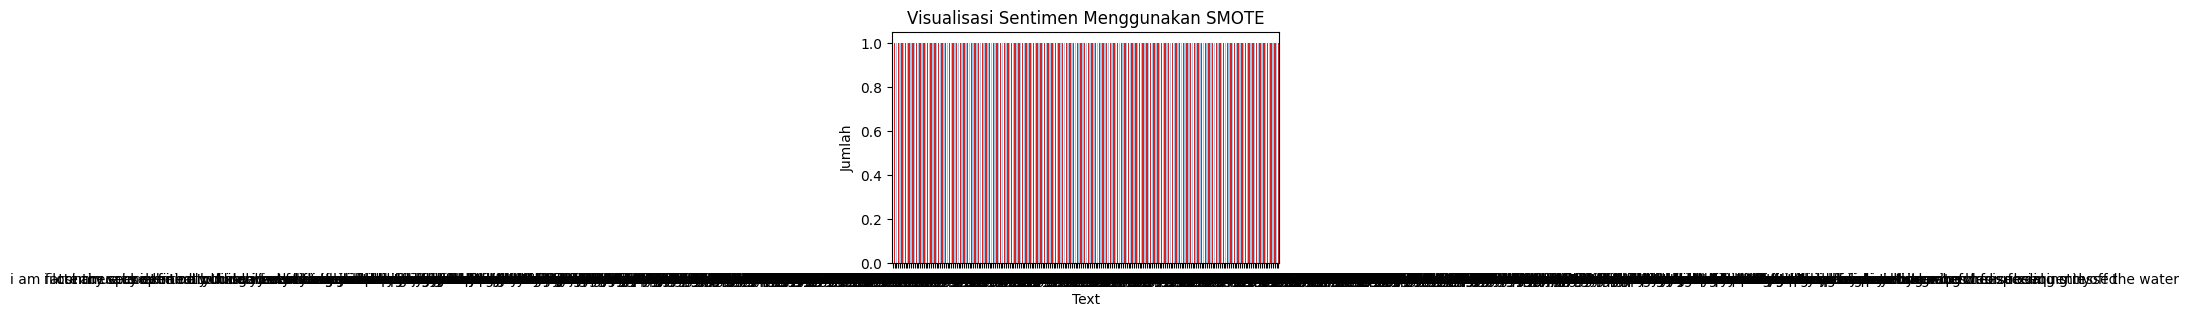

In [ ]:
# Contoh data hasil resampling
import matplotlib.pyplot as plt
import seaborn as sns
Text_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
sns.countplot(x=y_train_resampled, palette={"red", "lightskyblue"})
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xlabel('Text')
plt.ylabel("Jumlah")
plt.xticks(Text_counts.index, ['0', '1'])
plt.show()

5. Modelling

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df['text_clean'] = df['Text'].str.lower()

In [ ]:
# 3. Split Data
X = df['text_clean']
y = df['Emotion']

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Retrain the naive_bayes model on the entire training set with the correct number of features
naive_bayes = MultinomialNB()  # Or any other model you were using
naive_bayes.fit(X_train_tfidf, y_train)  # Fit on the training data

# Now predict using the retrained model
y_pred = naive_bayes.predict(X_test_tfidf)

In [ ]:
# 7. Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3

Confusion Matrix:
 [[ 0  0  6  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 15  0  1  0]
 [ 0  0  4  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  4  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         6
        fear       0.00      0.00      0.00         3
       happy       0.31      0.94      0.46        16
        love       0.00      0.00      0.00         4
     sadness       0.00      0.00      0.00        17
    surprise       0.00      0.00      0.00         4

    accuracy                           0.30        50
   macro avg       0.05      0.16      0.08        50
weighted avg       0.10      0.30      0.15        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
